# 1. Getting Used to Handling Language Data

In [1]:
from datasets import load_dataset

dataset = load_dataset("ag_news")

/Users/johnnybui/opt/miniconda3/envs/torch-mps/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset ag_news (/Users/johnnybui/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)
100%|██████████| 2/2 [00:00<00:00, 56.43it/s]


In [2]:
dataset['train']['text'][0:10]
# dataset

["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.',
 "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums.",
 'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\\flows from the main pipeline in southern Iraq after\\intelligence showed a rebel militia could strike\\infrastructure, an oil official said on Saturday.',
 'Oil prices soar to all-time record, posing new menace to US economy (A

In [41]:
from collections import Counter 
from re import sub, compile
import matplotlib.pyplot as plt
import numpy as np

class UnimplementedFunctionError(Exception):
    pass

class Vocabulary:

    def __init__(self, corpus):

        self.word2idx, self.idx2word, self.freq = self.build_vocab(corpus)
        self.size = len(self.word2idx)

    def most_common(self, k):
        freq = sorted(self.freq.items(), key=lambda x: x[1], reverse=True)
        return [t for t,f in freq[:k]]


    def text2idx(self, text):
        tokens = self.tokenize(text)
        return [self.word2idx[t] if t in self.word2idx.keys() else self.word2idx['UNK'] for t in tokens]

    def idx2text(self, idxs):
        return [self.idx2word[i] if i in self.idx2word.keys() else 'UNK' for i in idxs]


    ###########################
    ## TASK 1.1                ##
    ###########################
    def tokenize(self, text):
        """
        
        tokenize takes in a string of text, remove punctuations and returns an 
        array of strings splitting the text into discrete tokens.

        :params: 
        - text: a string, e.g. "The blue dog jumped, but not high."

        :returns:
        - tokens: a list of strings derived from the text, e.g. ["the", "blue", 
        "dog", "jumped", "but", "not", "high"] for word-level tokenization
        
        """ 
        text = sub(r'[^\w\s]', '', text)
        return text.split()



    ###########################
    ## TASK 1.2                 ##
    ###########################
    def build_vocab(self,corpus):
        """
        
        build_vocab takes in list of strings corresponding to a text corpus, tokenizes the strings, and builds a finite vocabulary

        :params:
        - corpus: a list string to build a vocabulary over

        :returns: 
        - word2idx: a dictionary mapping token strings to their numerical index in the dictionary e.g. { "dog": 0, "but":1, ..., "UNK":129}
        - idx2word: the inverse of word2idx mapping an index in the vocabulary to its word e.g. {0: "dog", 1:"but", ..., 129:"UNK"}
        - freq: a dictionary of words and frequency counts over the corpus (including words not in the dictionary), e.g. {"dog":102, "the": 18023, ...}

        """ 
        word2idx = {}
        idx2word = {}
        freq = {}
        index = 0
        
        for s in corpus:
            for token in self.tokenize(s):
                if token not in word2idx.keys():
                    word2idx[token] = index
                    idx2word[index] = token
                    freq[token] = 1
                    index += 1
                else:
                    freq[token] += 1
                    
        return word2idx, idx2word, freq
    
    ###########################
    ## TASK 1.3              ##
    ###########################
    def make_vocab_charts(self):
        """
        
        make_vocab_charts plots word frequency and cumulative coverage charts 
        for this vocabulary. See handout for more details

        
        """ 
        cutoff = 50
        
        ax1 = plt.figure(figsize=(16,6))
        ax1 = plt.subplot(1,2,1)
        
        sorted_freq = self.most_common(len(self.freq))
        most_freq = [self.freq[k] for k in sorted_freq]
        
        cutoff_idx = -1
        occ_sum = sum(most_freq)
        cfc = [0]
        for i in range(len(most_freq)):
            if cutoff_idx == -1 and most_freq[i] < 50:
                cutoff_idx = i - 1
                
            cfc.append((cfc[-1] + most_freq[i] / occ_sum))
        
        ax1.plot(list(range(len(most_freq))), most_freq)
        ax1.axhline(y=cutoff, color='r')
        ax1.set_yscale("log")
        ax1.set_xlabel("Token ID (sorted by frequency)")
        ax1.set_xlabel("Frequency")
        ax1.set_title("Token Frequency Distribution")

        ax2 = plt.subplot(1,2,2)
        ax2.plot(list(range(len(cfc[1:]))), cfc[1:])
        ax2.axvline(x=cutoff_idx, color='r', label=str(most_freq[cutoff_idx]))
        plt.title("Cumulative Fraction Covered")
        plt.xlabel("Token ID (sorted by frequency)")
        plt.ylabel("Fraction of Token Occurences Covered")
        
        plt.savefig("Vocabulary.jpg")


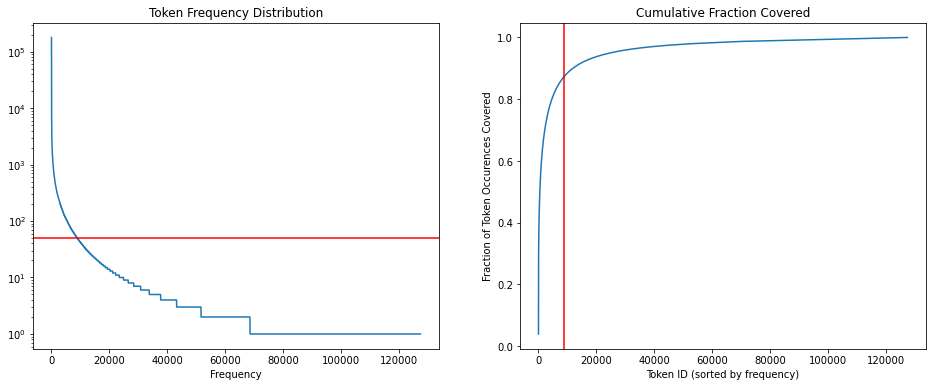

In [43]:
vocab = Vocabulary(dataset['train']['text'])
vocab.tokenize("Bears are hug sdfsf e~~~~!!!")
vocab.make_vocab_charts()

# 2. Frequency-Based Word Vectors - PPMI

# 3. Learning-Based Word Vectors - GloVe

# 4. Exploring Learned Biases in word2vec Vectors